#**Overview**

The data is a dummy data that I worked on during virtual internship with RevoU partnering with Astro. It contains records of customers information, products sold, medium and source details. Contain up to 109K rows and 22 columns.

##**Objectives**

Marketing team wants to know more about their customer characteristics.

##**To-Do**

1. Select the related variable and conduct customer segmentation in order to personalize the approach and define the marketing strategy better. 
2. What are the characteristics or behavior of each customer segmentation.
3. Give insights and recommendations to the business problem.


#**Libraries**

Preparing libraries that are going to be used to analyze the data with.

##**Import**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from datetime import datetime
from datetime import timedelta
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn import cluster

#**Dataset**

Dataset used for the analysis.

##**Import**

In [2]:
sheet = 'https://docs.google.com/spreadsheets/d/1TTbrGkt1sadaHVRWwajQy3kigENiIMCoyy5lTPBocyY/edit#gid=177922645'
sheet = sheet.replace('/edit#gid=', '/export?format=csv&gid=')
df_item = pd.read_csv(sheet)
df_item.head()

,transaction_id,qty,price,total_amount,product_id,category_id,category
0,7,4,18000,72000,C2,C,C. Susu & Olahan Susu
1,7,4,18000,72000,C2,C,C. Susu & Olahan Susu
2,7,2,70000,140000,E2,E,E. Kebutuhan Pokok
3,8,2,40000,80000,B2,B,B. Makanan Beku
4,8,2,38000,76000,B3,B,B. Makanan Beku


In [3]:
sheet2 = 'https://docs.google.com/spreadsheets/d/1-h-V491IzPxN5FV21PGnLfbgAcTWrdXM9ZN9UN0oWiM/edit#gid=1638979393'
sheet2 = sheet2.replace('/edit#gid=', '/export?format=csv&gid=')
df_user = pd.read_csv(sheet2)
df_user.head()

,user_id,region,register_date,age,gender,region_name
0,1,1,29/12/21 06.38,35,F,Pusat
1,2,3,30/12/21 13.44,33,M,Selatan
2,3,1,30/12/21 17.38,40,M,Pusat
3,4,1,31/12/21 11.00,24,F,Pusat
4,5,1,30/12/21 15.47,34,M,Pusat


In [4]:
sheet3 = 'https://docs.google.com/spreadsheets/d/1IV6raiwtT8PSDv6tGTp5m6AmATbKHFrz1JD1apwovLA/edit#gid=520934903'
sheet3 = sheet3.replace('/edit#gid=', '/export?format=csv&gid=')
df_payment = pd.read_csv(sheet3)
df_payment.head()

,transaction_id,session_id,paid_time,complete,user_id,payment_method,total_amount,payment_type
0,10,20,01/01/22 05.02,0,1,1,480000,QRIS
1,16,38,01/01/22 07.21,1,9,1,116000,QRIS
2,18,47,01/01/22 07.58,1,11,1,38000,QRIS
3,27,78,01/01/22 10.40,1,20,1,53000,QRIS
4,32,91,01/01/22 11.47,1,25,1,68000,QRIS


In [5]:
sheet4 = 'https://docs.google.com/spreadsheets/d/1kjjrlM_ljDP6V8wBi-eEl6lB_L5N3EeK5u8wmJf7CtM/edit#gid=388336184'
sheet4 = sheet4.replace('/edit#gid=', '/export?format=csv&gid=')
df_session = pd.read_csv(sheet4)
df_session.head()

,session_id,user_id,timestamp,Unnamed: 3,Unnamed: 4,event,session_source,session_medium
0,11,1,01-01-22 01.26.47,1/1/2022,01.26.47,Homepage,Organic Search,Google
1,11,1,01-01-22 01.26.52,1/1/2022,01.26.52,Product View,Organic Search,Google
2,11,1,01-01-22 01.28.00,1/1/2022,01.28.00,View Cart,Organic Search,Google
3,11,1,01-01-22 01.28.14,1/1/2022,01.28.14,Check Out,Organic Search,Google
4,11,1,01-01-22 01.28.22,1/1/2022,01.28.22,Choose Payment Method,Organic Search,Google


##**Clean**

Cleaning the dataset before doing further analysis, to minimize or getting rid of biases or incorrect data.

###**Missing Values**

Checking for duplicated values inside each of the dataset.

In [6]:
df_item.isna().sum()

transaction_id    0
qty               0
price             0
total_amount      0
product_id        0
category_id       0
category          0
dtype: int64

In [7]:
df_user.isna().sum()

user_id          0
region           0
register_date    0
age              0
gender           0
region_name      0
dtype: int64

In [8]:
df_payment.isna().sum()

transaction_id    0
session_id        0
paid_time         0
complete          0
user_id           0
payment_method    0
total_amount      0
payment_type      0
dtype: int64

In [9]:
df_session.isna().sum()

session_id        0
user_id           0
timestamp         0
Unnamed: 3        0
Unnamed: 4        0
event             0
session_source    0
session_medium    0
dtype: int64

There isn't any null values inside each of the dataset.

###**Duplicates**

Checking duplicated data inside each of dataset.

In [10]:
df_item.duplicated().sum()

3238

In [11]:
df_user.duplicated().sum()

0

In [12]:
df_payment.duplicated().sum()

0

In [13]:
df_session.duplicated().sum()

0

There are some duplicates in **df_item**, but it's not an outlier or wrong inputed data, **df_item** stores data about item's category and also **transaction_id** which are each time a person purchase an item in 1 transaction they have 1 **transaction_id**.

###**Irrelevant Columns & Rows**

Checking and removing columns and rows that irrelevant to the objective of the analysis.

In [14]:
df_p = df_payment.drop(columns='total_amount')
df_p

,transaction_id,session_id,paid_time,complete,user_id,payment_method,payment_type
0,10,20,01/01/22 05.02,0,1,1,QRIS
1,16,38,01/01/22 07.21,1,9,1,QRIS
2,18,47,01/01/22 07.58,1,11,1,QRIS
3,27,78,01/01/22 10.40,1,20,1,QRIS
4,32,91,01/01/22 11.47,1,25,1,QRIS
...,...,...,...,...,...,...,...
38407,38285,93408,31/08/22 19.05,1,11597,5,Transfer Rekening
38408,38308,93448,31/08/22 19.48,1,18201,5,Transfer Rekening
38409,38333,93501,31/08/22 20.36,1,4672,5,Transfer Rekening
38410,38406,93650,31/08/22 22.40,1,5056,5,Transfer Rekening


In [15]:
df_sp = df_session[df_session['event'] == 'Paid']
df_sp = df_sp.drop(columns=['event', 'timestamp'])
df_sp

,session_id,user_id,Unnamed: 3,Unnamed: 4,session_source,session_medium
5,11,1,1/1/2022,01.33.21,Organic Search,Google
22,16,2,1/1/2022,03.59.40,CPC,Facebook
28,17,3,1/1/2022,04.25.38,Email,Newsletter
43,20,1,1/1/2022,05.02.41,Organic Social,Instagram
64,25,4,1/1/2022,05.31.37,CPC,Youtube
...,...,...,...,...,...,...
383026,93666,17811,31-08-22,23.08.00,CPC,Google Search
383032,93667,8591,31-08-22,23.20.05,Direct,Direct
383038,93668,12629,31-08-22,23.26.44,Email,Newsletter
383056,93673,18219,1/9/2022,00.01.09,Organic Social,Facebook


From the dataset above the irrelevant columns are:
1. **df_payment:** Removing **total_amount**, because it's already exists in other dataset.
2. **df_session:** filtering only **paid event** are shown, so we can conclude that all the user listed are the user who already or have been using our services. Removing **event** and **timestamp** columns.


###**Data Type**

Checking if each dataset already have the right data type.

In [16]:
df_user.info()
df_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18220 entries, 0 to 18219
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   user_id        18220 non-null  int64 
 1   region         18220 non-null  int64 
 2   register_date  18220 non-null  object
 3   age            18220 non-null  int64 
 4   gender         18220 non-null  object
 5   region_name    18220 non-null  object
dtypes: int64(3), object(3)
memory usage: 854.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38412 entries, 0 to 38411
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   transaction_id  38412 non-null  int64 
 1   session_id      38412 non-null  int64 
 2   paid_time       38412 non-null  object
 3   complete        38412 non-null  int64 
 4   user_id         38412 non-null  int64 
 5   payment_method  38412 non-null  int64 
 6   payment_type    38412 non-null 

In [17]:
df_u = df_user.copy()
df_u['register_date'] = pd.to_datetime(df_u['register_date'], format="%d/%m/%y %H.%M")
df_u

,user_id,region,register_date,age,gender,region_name
0,1,1,2021-12-29 06:38:00,35,F,Pusat
1,2,3,2021-12-30 13:44:00,33,M,Selatan
2,3,1,2021-12-30 17:38:00,40,M,Pusat
3,4,1,2021-12-31 11:00:00,24,F,Pusat
4,5,1,2021-12-30 15:47:00,34,M,Pusat
...,...,...,...,...,...,...
18215,18216,2,2022-08-31 13:33:00,27,F,Timur
18216,18217,2,2022-08-31 02:32:00,19,F,Timur
18217,18218,2,2022-08-30 11:32:00,25,F,Timur
18218,18219,2,2022-08-31 21:02:00,27,F,Timur


In [18]:
df_p['paid_time'] = pd.to_datetime(df_p['paid_time'], format="%d/%m/%y %H.%M")
df_p

,transaction_id,session_id,paid_time,complete,user_id,payment_method,payment_type
0,10,20,2022-01-01 05:02:00,0,1,1,QRIS
1,16,38,2022-01-01 07:21:00,1,9,1,QRIS
2,18,47,2022-01-01 07:58:00,1,11,1,QRIS
3,27,78,2022-01-01 10:40:00,1,20,1,QRIS
4,32,91,2022-01-01 11:47:00,1,25,1,QRIS
...,...,...,...,...,...,...,...
38407,38285,93408,2022-08-31 19:05:00,1,11597,5,Transfer Rekening
38408,38308,93448,2022-08-31 19:48:00,1,18201,5,Transfer Rekening
38409,38333,93501,2022-08-31 20:36:00,1,4672,5,Transfer Rekening
38410,38406,93650,2022-08-31 22:40:00,1,5056,5,Transfer Rekening


In [19]:
df_u.info()
df_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18220 entries, 0 to 18219
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   user_id        18220 non-null  int64         
 1   region         18220 non-null  int64         
 2   register_date  18220 non-null  datetime64[ns]
 3   age            18220 non-null  int64         
 4   gender         18220 non-null  object        
 5   region_name    18220 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 854.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38412 entries, 0 to 38411
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  38412 non-null  int64         
 1   session_id      38412 non-null  int64         
 2   paid_time       38412 non-null  datetime64[ns]
 3   complete        38412 non-null  int64   

timeseries data type need to be fixed in **df_user** and **df_payment**.

##**Merge**

Merging the dataset.

In [20]:
df_i = df_item.copy()

In [21]:
df = df_u.merge(df_sp, how = 'left', left_on = 'user_id', right_on = 'user_id').merge(df_p, how = 'left', left_on = ['user_id','session_id'], right_on = ['user_id','session_id']).merge(df_i, how = 'left', left_on = 'transaction_id', right_on = 'transaction_id')
df

,user_id,region,register_date,age,gender,region_name,session_id,Unnamed: 3,Unnamed: 4,session_source,...,paid_time,complete,payment_method,payment_type,qty,price,total_amount,product_id,category_id,category
0,1,1,2021-12-29 06:38:00,35,F,Pusat,11,1/1/2022,01.33.21,Organic Search,...,2022-01-01 01:33:00,1.0,2.0,Kartu Kredit,4.0,18000.0,72000.0,C2,C,C. Susu & Olahan Susu
1,1,1,2021-12-29 06:38:00,35,F,Pusat,11,1/1/2022,01.33.21,Organic Search,...,2022-01-01 01:33:00,1.0,2.0,Kartu Kredit,4.0,18000.0,72000.0,C2,C,C. Susu & Olahan Susu
2,1,1,2021-12-29 06:38:00,35,F,Pusat,11,1/1/2022,01.33.21,Organic Search,...,2022-01-01 01:33:00,1.0,2.0,Kartu Kredit,2.0,70000.0,140000.0,E2,E,E. Kebutuhan Pokok
3,1,1,2021-12-29 06:38:00,35,F,Pusat,20,1/1/2022,05.02.41,Organic Social,...,2022-01-01 05:02:00,0.0,1.0,QRIS,3.0,10000.0,30000.0,A1,A,A. Sayur
4,1,1,2021-12-29 06:38:00,35,F,Pusat,20,1/1/2022,05.02.41,Organic Social,...,2022-01-01 05:02:00,0.0,1.0,QRIS,3.0,11000.0,33000.0,A2,A,A. Sayur
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109982,18217,2,2022-08-31 02:32:00,19,F,Timur,93658,31-08-22,22.57.42,CPC,...,2022-08-31 22:57:00,1.0,4.0,Virtual Account,1.0,90000.0,90000.0,E3,E,E. Kebutuhan Pokok
109983,18218,2,2022-08-30 11:32:00,25,F,Timur,93662,31-08-22,23.01.29,Organic Social,...,2022-08-31 23:01:00,1.0,5.0,Transfer Rekening,2.0,10000.0,20000.0,A1,A,A. Sayur
109984,18218,2,2022-08-30 11:32:00,25,F,Timur,93662,31-08-22,23.01.29,Organic Social,...,2022-08-31 23:01:00,1.0,5.0,Transfer Rekening,1.0,43000.0,43000.0,G2,G,G. Unggas
109985,18219,2,2022-08-31 21:02:00,27,F,Timur,93673,1/9/2022,00.01.09,Organic Social,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##**Clean II**

Cleaning dataset after we merge it.

###**Missing Values**

Checking if there's any missing values in the dataset.

In [22]:
df.isna().sum()

user_id           0
region            0
register_date     0
age               0
gender            0
region_name       0
session_id        0
Unnamed: 3        0
Unnamed: 4        0
session_source    0
session_medium    0
transaction_id    2
paid_time         2
complete          2
payment_method    2
payment_type      2
qty               2
price             2
total_amount      2
product_id        2
category_id       2
category          2
dtype: int64

In [23]:
df = df.dropna()

In [24]:
df.isna().sum()

user_id           0
region            0
register_date     0
age               0
gender            0
region_name       0
session_id        0
Unnamed: 3        0
Unnamed: 4        0
session_source    0
session_medium    0
transaction_id    0
paid_time         0
complete          0
payment_method    0
payment_type      0
qty               0
price             0
total_amount      0
product_id        0
category_id       0
category          0
dtype: int64

After checking there seems to be some missing values and we can remove it because it's only small number of data.

###**Data Type**

Checking the datatype.

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109985 entries, 0 to 109984
Data columns (total 22 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   user_id         109985 non-null  int64         
 1   region          109985 non-null  int64         
 2   register_date   109985 non-null  datetime64[ns]
 3   age             109985 non-null  int64         
 4   gender          109985 non-null  object        
 5   region_name     109985 non-null  object        
 6   session_id      109985 non-null  int64         
 7   Unnamed: 3      109985 non-null  object        
 8   Unnamed: 4      109985 non-null  object        
 9   session_source  109985 non-null  object        
 10  session_medium  109985 non-null  object        
 11  transaction_id  109985 non-null  float64       
 12  paid_time       109985 non-null  datetime64[ns]
 13  complete        109985 non-null  float64       
 14  payment_method  109985 non-null  flo

In [26]:
df[['transaction_id', 'complete', 'payment_method', 'qty', 'price', 'total_amount']] = df[['transaction_id', 'complete', 'payment_method', 'qty', 'price', 'total_amount']].astype(int)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109985 entries, 0 to 109984
Data columns (total 22 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   user_id         109985 non-null  int64         
 1   region          109985 non-null  int64         
 2   register_date   109985 non-null  datetime64[ns]
 3   age             109985 non-null  int64         
 4   gender          109985 non-null  object        
 5   region_name     109985 non-null  object        
 6   session_id      109985 non-null  int64         
 7   Unnamed: 3      109985 non-null  object        
 8   Unnamed: 4      109985 non-null  object        
 9   session_source  109985 non-null  object        
 10  session_medium  109985 non-null  object        
 11  transaction_id  109985 non-null  int64         
 12  paid_time       109985 non-null  datetime64[ns]
 13  complete        109985 non-null  int64         
 14  payment_method  109985 non-null  int

Changing float data type into integer.

##**Copy**

Making a copy of the dataset.

In [28]:
dfc = df.copy()

##**Desc Stats**

Doing descriptive statistics to see the spread of the data.

In [29]:
df_desc = dfc[['age', 'price', 'total_amount']].describe()
df_desc.loc['Skewness'] = dfc[['age', 'price', 'total_amount']].skew()
df_desc.loc['Kurtosis'] = dfc[['age', 'price', 'total_amount']].kurt()
df_desc.loc['Variance'] = dfc[['age', 'price', 'total_amount']].var()
df_desc.loc['Coefficient of Variance'] = np.std(dfc[['age', 'price', 'total_amount']])/np.mean(dfc[['age', 'price', 'total_amount']])*100
df_desc = round(df_desc, 2)
df_desc

,age,price,total_amount
count,109985.00,1.099850e+05,1.099850e+05
mean,28.58,3.737421e+04,6.676667e+04
std,5.45,2.490797e+04,4.942857e+04
min,19.00,8.000000e+03,8.000000e+03
25%,24.00,1.200000e+04,3.300000e+04
50%,28.00,3.500000e+04,5.400000e+04
75%,33.00,4.300000e+04,8.500000e+04
max,40.00,9.000000e+04,2.700000e+05
Skewness,0.20,6.800000e-01,1.480000e+00
Kurtosis,-0.81,-6.200000e-01,2.180000e+00


##**Transform**

Transforming the qualitative data into dummies (0 and 1), so it can be summmed later on to see which are the most popular or used variables.

In [30]:
df_t = pd.get_dummies(dfc, columns=['session_source', 'session_medium', 'payment_type', 'category_id'])
df_t = df_t.drop(columns=['region', 'register_date', 'session_id', 'paid_time', 'complete', 'payment_method', 'price', 'product_id', 'category'])
df_t

,user_id,age,gender,region_name,Unnamed: 3,Unnamed: 4,transaction_id,qty,total_amount,session_source_CPC,...,category_id_A,category_id_B,category_id_C,category_id_D,category_id_E,category_id_F,category_id_G,category_id_H,category_id_I,category_id_J
0,1,35,F,Pusat,1/1/2022,01.33.21,7,4,72000,0,...,0,0,1,0,0,0,0,0,0,0
1,1,35,F,Pusat,1/1/2022,01.33.21,7,4,72000,0,...,0,0,1,0,0,0,0,0,0,0
2,1,35,F,Pusat,1/1/2022,01.33.21,7,2,140000,0,...,0,0,0,0,1,0,0,0,0,0
3,1,35,F,Pusat,1/1/2022,05.02.41,10,3,30000,0,...,1,0,0,0,0,0,0,0,0,0
4,1,35,F,Pusat,1/1/2022,05.02.41,10,3,33000,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109980,18217,19,F,Timur,31-08-22,22.57.42,38412,1,11000,1,...,1,0,0,0,0,0,0,0,0,0
109981,18217,19,F,Timur,31-08-22,22.57.42,38412,1,40000,1,...,0,1,0,0,0,0,0,0,0,0
109982,18217,19,F,Timur,31-08-22,22.57.42,38412,1,90000,1,...,0,0,0,0,1,0,0,0,0,0
109983,18218,25,F,Timur,31-08-22,23.01.29,38413,2,20000,0,...,1,0,0,0,0,0,0,0,0,0


In [31]:
df_t.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109985 entries, 0 to 109984
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   user_id                         109985 non-null  int64 
 1   age                             109985 non-null  int64 
 2   gender                          109985 non-null  object
 3   region_name                     109985 non-null  object
 4   Unnamed: 3                      109985 non-null  object
 5   Unnamed: 4                      109985 non-null  object
 6   transaction_id                  109985 non-null  int64 
 7   qty                             109985 non-null  int64 
 8   total_amount                    109985 non-null  int64 
 9   session_source_CPC              109985 non-null  uint8 
 10  session_source_Direct           109985 non-null  uint8 
 11  session_source_Email            109985 non-null  uint8 
 12  session_source_Organic Search 

In [32]:
df_tf = df_t.assign(
    total_item_ordered = df_t['qty'],
    total_purchase_amount = df_t['total_amount'],
    qty_a = df_t['qty']*df_t['category_id_A'],
    qty_b = df_t['qty']*df_t['category_id_B'],
    qty_c = df_t['qty']*df_t['category_id_C'],
    qty_d = df_t['qty']*df_t['category_id_D'],
    qty_e = df_t['qty']*df_t['category_id_E'],
    qty_f = df_t['qty']*df_t['category_id_F'],
    qty_g = df_t['qty']*df_t['category_id_G'],
    qty_h = df_t['qty']*df_t['category_id_H'],
    qty_i = df_t['qty']*df_t['category_id_I'],
    qty_j = df_t['qty']*df_t['category_id_J']
)

df_tf = df_tf.assign(
    user_id = df_t['user_id'],
    ss_cpc = df_t['session_source_CPC'],
    ss_direct = df_t['session_source_Direct'],
    ss_email = df_t['session_source_Email'],
    ss_organic_search = df_t['session_source_Organic Search'],
    ss_organic_social = df_t['session_source_Organic Social'],
    sm_direct = df_t['session_medium_Direct'],
    sm_facebook = df_t['session_medium_Facebook'],
    sm_google = df_t['session_medium_Google'],
    sm_google_search = df_t['session_medium_Google Search'],
    sm_instagram = df_t['session_medium_Instagram'],
    sm_newsletter = df_t['session_medium_Newsletter'],
    sm_youtube = df_t['session_medium_Youtube'],
    pay_kartu_debit = df_t['payment_type_Kartu Debit'],
    pay_kartu_kredit = df_t['payment_type_Kartu Kredit'],
    pay_qris = df_t['payment_type_QRIS'],
    pay_transfer_rekening = df_t['payment_type_Transfer Rekening'],
    pay_virtual_account = df_t['payment_type_Virtual Account'],
)

df_tf = df_tf.groupby('user_id').agg({
    'qty_a' : 'sum',
    'qty_b' : 'sum',
    'qty_c' : 'sum',
    'qty_d' : 'sum',
    'qty_e' : 'sum',
    'qty_f' : 'sum',
    'qty_g' : 'sum',
    'qty_h' : 'sum',
    'qty_i' : 'sum',
    'qty_j' : 'sum',
    'ss_cpc' : 'sum',
    'ss_direct' : 'sum',
    'ss_email' : 'sum',
    'ss_organic_search' : 'sum',
    'ss_organic_social' : 'sum',
    'sm_direct' : 'sum',
    'sm_facebook' : 'sum',
    'sm_google' : 'sum',
    'sm_google_search' : 'sum',
    'sm_instagram' : 'sum',
    'sm_newsletter' : 'sum',
    'sm_youtube' : 'sum',
    'pay_kartu_debit' : 'sum',
    'pay_kartu_kredit' : 'sum',
    'pay_qris' : 'sum',
    'pay_transfer_rekening' : 'sum',
    'pay_virtual_account' : 'sum',
})

df_tf.reset_index(inplace=True)

In [33]:
df_tf

,user_id,qty_a,qty_b,qty_c,qty_d,qty_e,qty_f,qty_g,qty_h,qty_i,...,sm_google,sm_google_search,sm_instagram,sm_newsletter,sm_youtube,pay_kartu_debit,pay_kartu_kredit,pay_qris,pay_transfer_rekening,pay_virtual_account
0,1,6,0,12,0,11,18,3,13,2,...,3,5,6,0,4,0,7,11,0,5
1,2,0,7,0,2,2,0,2,0,3,...,0,0,0,0,0,0,0,4,0,7
2,3,6,5,0,0,2,1,0,0,1,...,4,0,0,2,0,0,0,8,0,2
3,4,11,2,15,0,10,10,0,4,0,...,6,0,4,0,5,0,14,4,0,0
4,5,8,5,2,3,6,2,2,0,0,...,0,0,3,4,4,0,0,3,4,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18213,18214,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0
18214,18215,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0
18215,18216,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
18216,18217,1,1,0,0,1,0,0,0,0,...,0,0,0,0,3,0,0,0,0,3


Transformed data now shows category, source, medium and payment method.

#**Cluster**

Getting ready for making customers cluster.

##**Libraries II**

Preparing the libraries for doing the clustering.

###**Import**

Importing silhouette.

In [34]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
def silhoutte_analysis(data,cluster=[2,3,4]):
    X = data.to_numpy()

    range_n_clusters = cluster

    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(20, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters)
        cluster_labels = clusterer.fit_predict(X)

        # print(pd.DataFrame(cluster_labels).value_counts())

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print(
            "For n_clusters =",
            n_clusters,
            "The average silhouette_score is :",
            silhouette_avg,
        )

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(
                np.arange(y_lower, y_upper),
                0,
                ith_cluster_silhouette_values,
                facecolor=color,
                edgecolor=color,
                alpha=0.7,
            )

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(
            X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
        )

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(
            centers[:, 0],
            centers[:, 1],
            marker="o",
            c="white",
            alpha=1,
            s=200,
            edgecolor="k",
        )

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(
            "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
            % n_clusters,
            fontsize=14,
            fontweight="bold",
        )

    plt.show()

##**Prepare**

###**Irrelevant Columns**

Removing irrelevant columns by leaving only the transaction_id, total_amount and recency to be further used for turning it into RFM clustering by using KMeans.

In [35]:
df_prep = dfc.copy()
latest_purchase = max(df_prep['paid_time'])
df_prep['Recency'] = (latest_purchase - df_prep['paid_time']).dt.days
df_prep.drop(['age', 'region', 'register_date', 'gender', 'region_name', 'session_id', 'session_source', 'session_medium', 'paid_time', 'payment_method', 'payment_type', 'qty', 'price', 'product_id', 'category_id', 'category', 'complete'], axis = 1, inplace = True)
df_prep.head()

,user_id,Unnamed: 3,Unnamed: 4,transaction_id,total_amount,Recency
0,1,1/1/2022,01.33.21,7,72000,242
1,1,1/1/2022,01.33.21,7,72000,242
2,1,1/1/2022,01.33.21,7,140000,242
3,1,1/1/2022,05.02.41,10,30000,242
4,1,1/1/2022,05.02.41,10,33000,242


In [36]:
df_rfm = df_prep.groupby('user_id').agg(recency = pd.NamedAgg(column = 'Recency', aggfunc = 'min'),
                                                   frequency = pd.NamedAgg(column = 'transaction_id', aggfunc = 'count'),
                                                   monetary = pd.NamedAgg(column = 'total_amount', aggfunc = 'sum'))
df_rfm.reset_index(inplace = True)
df_rfm

,user_id,recency,frequency,monetary
0,1,1,23,2720000
1,2,66,11,641000
2,3,45,10,500000
3,4,30,18,1760000
4,5,39,15,1029000
...,...,...,...,...
18213,18214,0,2,49000
18214,18215,0,2,160000
18215,18216,0,1,8000
18216,18217,0,3,141000


###**Scale**

We scale the data first.

In [37]:
scaler = MinMaxScaler()
df_scaled = df_rfm.copy()
df_scaled[:] = scaler.fit_transform(df_rfm[:])
df_scaled

,user_id,recency,frequency,monetary
0,0.000000,0.004132,0.578947,0.707724
1,0.000055,0.272727,0.263158,0.165188
2,0.000110,0.185950,0.236842,0.128392
3,0.000165,0.123967,0.447368,0.457203
4,0.000220,0.161157,0.368421,0.266441
...,...,...,...,...
18213,0.999780,0.000000,0.026316,0.010699
18214,0.999835,0.000000,0.026316,0.039666
18215,0.999890,0.000000,0.000000,0.000000
18216,0.999945,0.000000,0.052632,0.034708


###**Elbow Method**

Using elbow method to see which potentialy have the best cluster number.

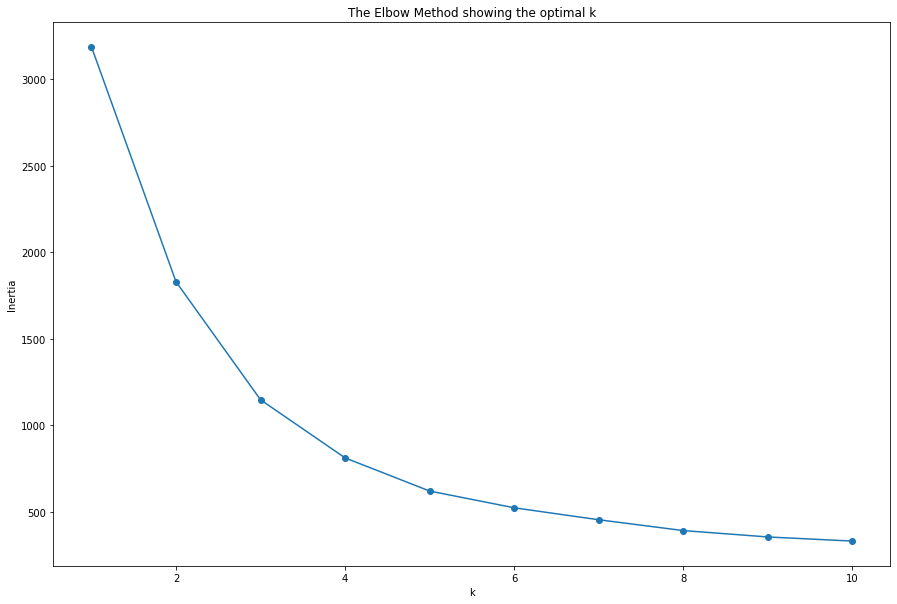

In [38]:
dist = []
ran = range(1, 11)

for i in ran:
  kmean_model = cluster.KMeans(n_clusters = i)
  kmean_model.fit(df_scaled)
  dist.append(kmean_model.inertia_)
dist

plt.figure(figsize=(15,10))
plt.plot(ran, dist, 'o-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()

###**Silhouette**

Using silhouette to compare with the elbow method to see which are the best cluster number.

For n_clusters = 3 The average silhouette_score is : 0.45793421290952957
For n_clusters = 4 The average silhouette_score is : 0.47935431134969
For n_clusters = 5 The average silhouette_score is : 0.42662649214087917
For n_clusters = 6 The average silhouette_score is : 0.44009282274150796
For n_clusters = 7 The average silhouette_score is : 0.3975453443722605
For n_clusters = 8 The average silhouette_score is : 0.3973643563508304
For n_clusters = 9 The average silhouette_score is : 0.37702597903133805


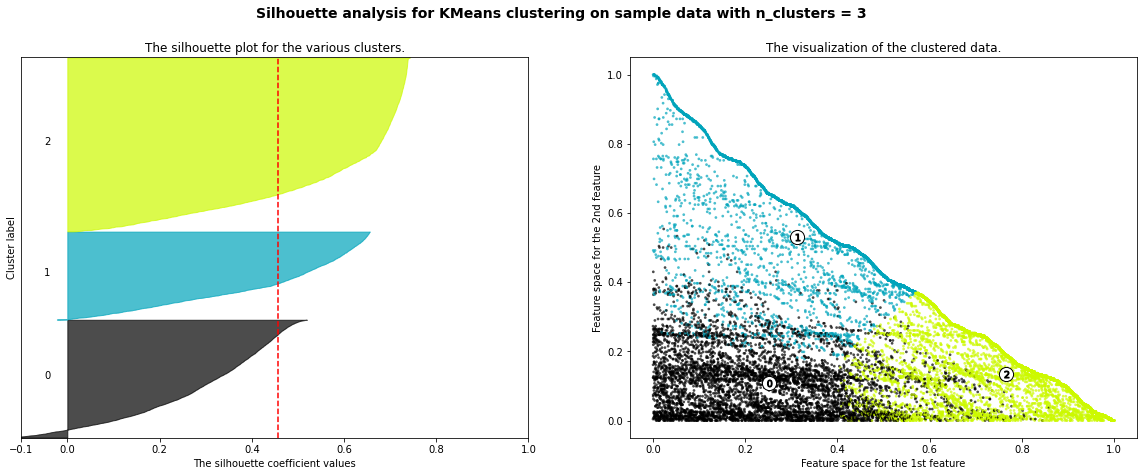

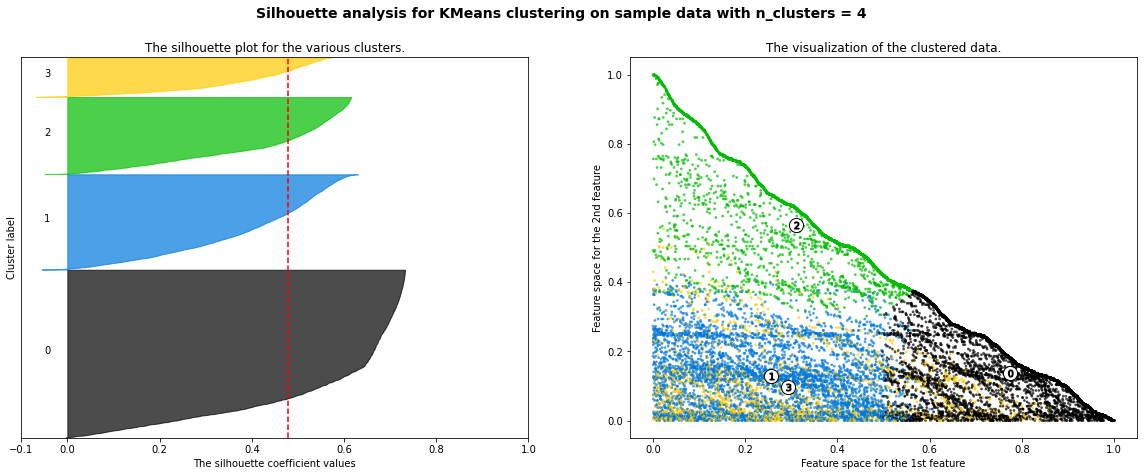

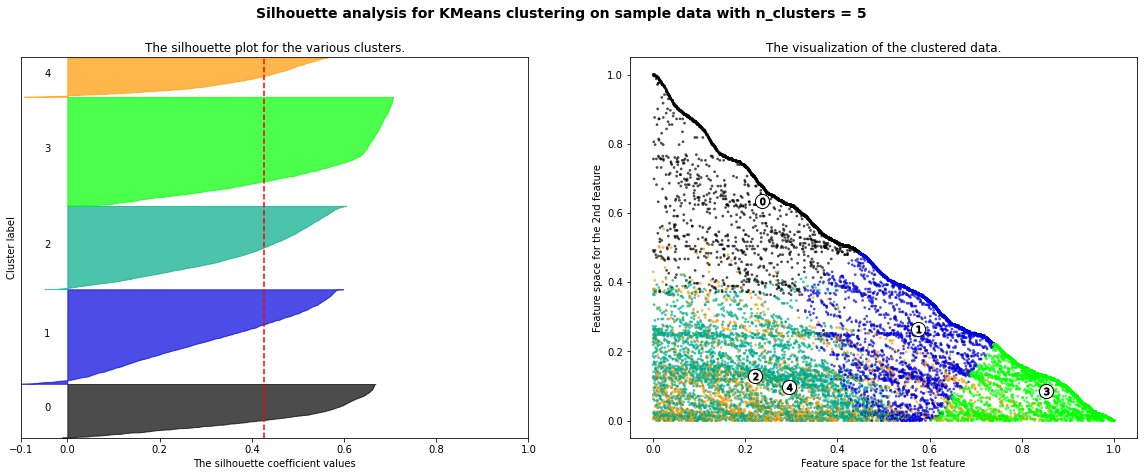

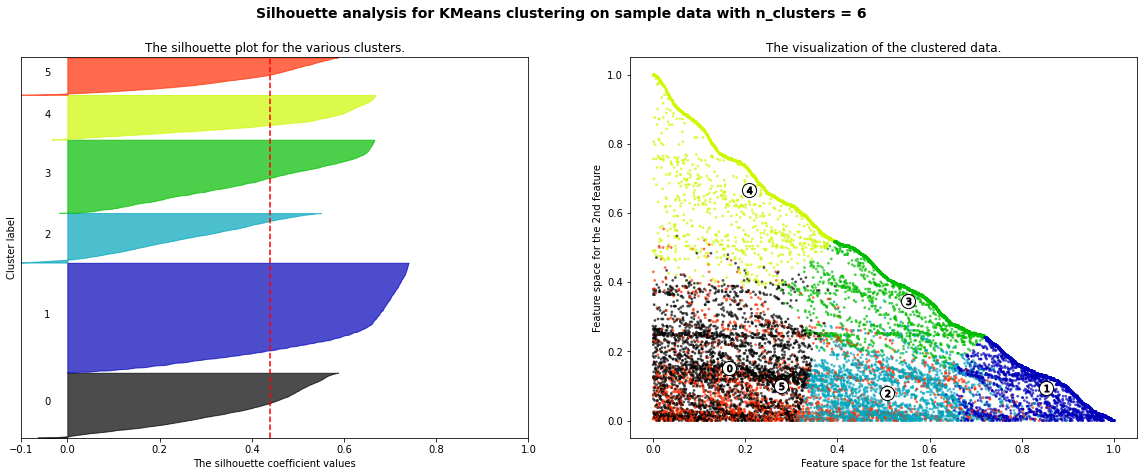

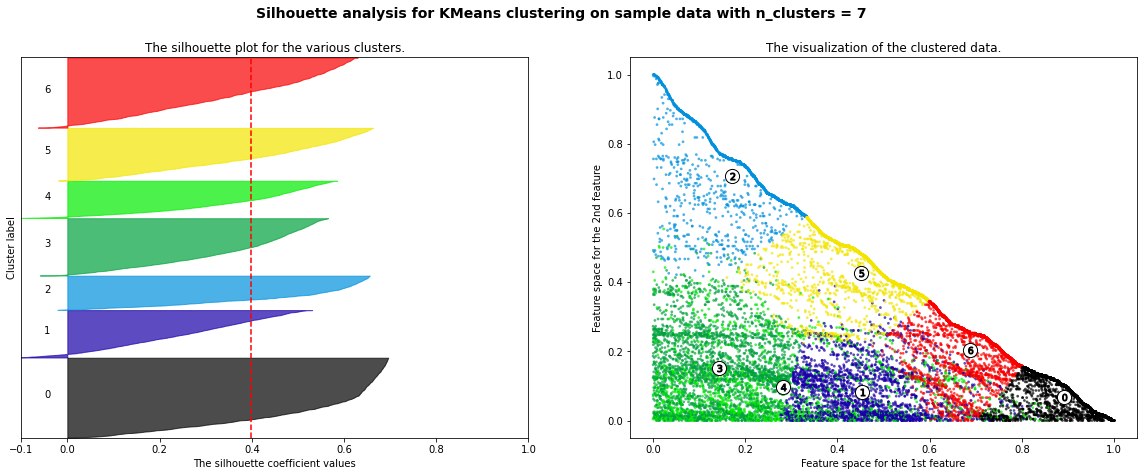

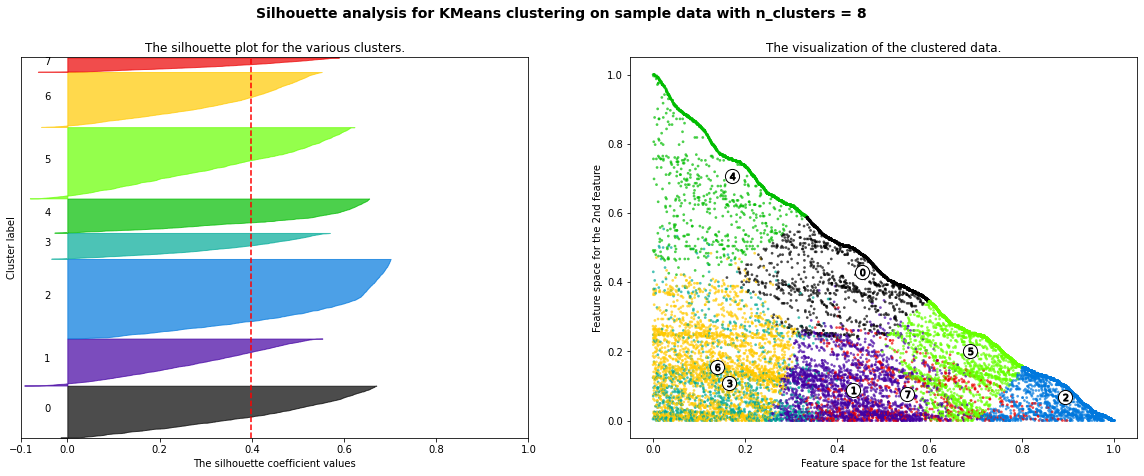

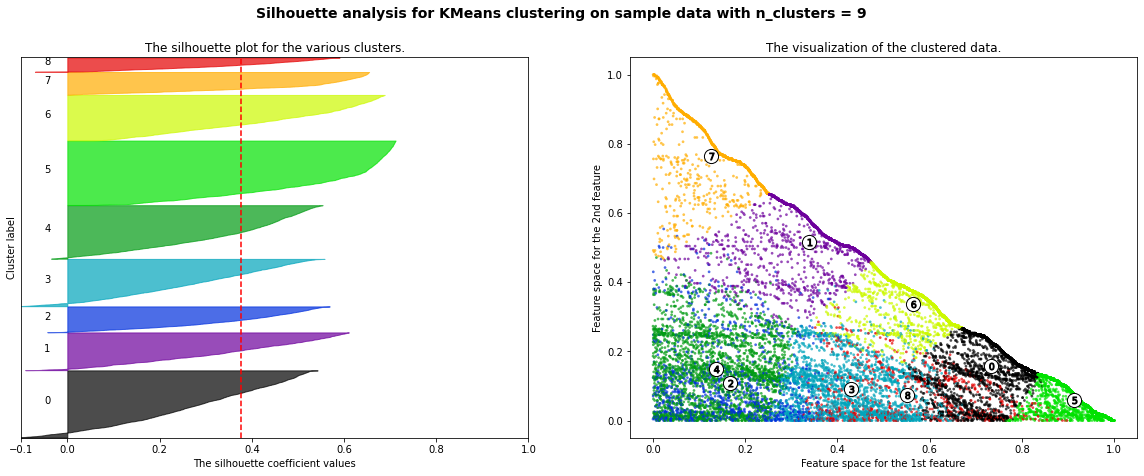

In [39]:
silhoutte_analysis(df_scaled,[3, 4, 5, 6, 7, 8, 9])

###**Apply**

Applying the cluster number to the RFM dataframe.

In [40]:
cluster_model = cluster.KMeans(n_clusters = 4, random_state = 42)
cluster_array = cluster_model.fit(df_rfm)
cluster_label = cluster_model.labels_

df_rfm['cluster'] = cluster_label
df_rfm.sort_values('cluster', ascending = False)

,user_id,recency,frequency,monetary,cluster
0,1,1,23,2720000,3
696,697,1,21,2381000,3
5420,5421,9,23,2126000,3
7091,7092,0,23,2502000,3
4136,4137,28,22,2293000,3
...,...,...,...,...,...
8491,8492,113,1,20000,0
8493,8494,113,2,95000,0
8495,8496,111,4,199000,0
8497,8498,86,3,88000,0


###**Distribution**

Here's how the distribution look like.

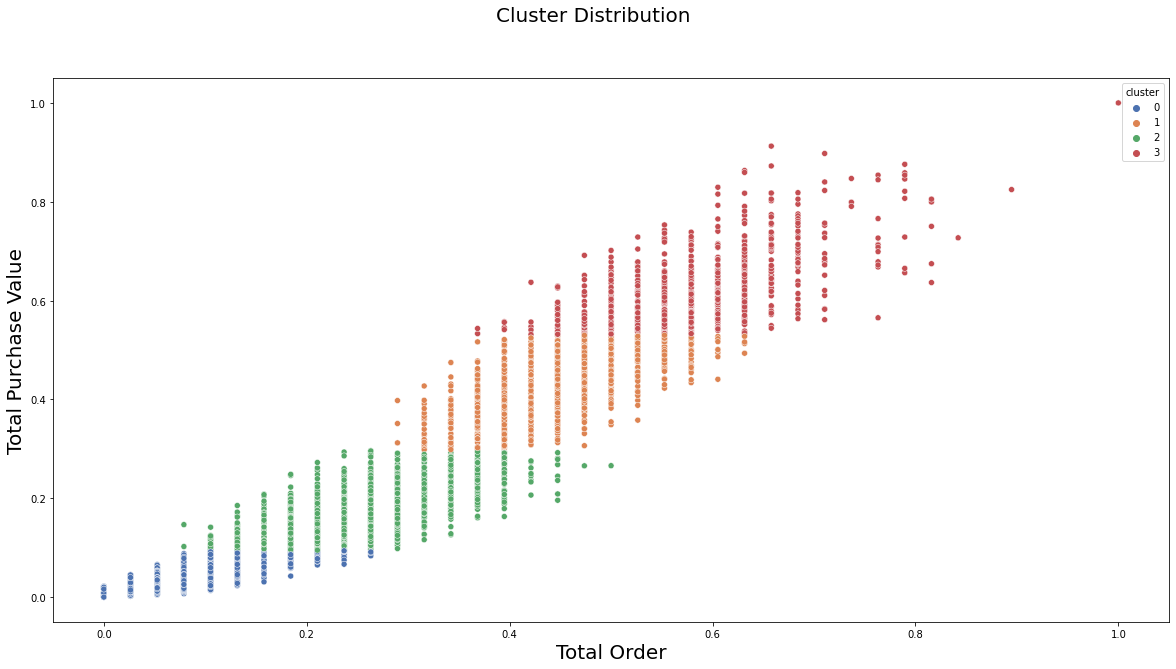

In [41]:
df_scaled['cluster'] = cluster_label

fig, ax = plt.subplots(figsize=(20,10))
fig.suptitle('Cluster Distribution', fontsize=20)
plt.xlabel('Total Order', fontsize=20)
plt.ylabel('Total Purchase Value', fontsize=20)
sns.scatterplot(data=df_scaled, x="frequency", y="monetary", hue="cluster", palette="deep")
plt.show()

##**Cluster Data**

###**merge**

Here are the total of user in each cluster.

In [42]:
df_rfm.reset_index(inplace=True)
df_rfm.groupby('cluster')[['user_id']].count()

,user_id
cluster,
0,13035
1,1164
2,3260
3,759


#**Cluster Analysis**

##**Prepare**

###**Characteristics**

Here are the characteristics of each cluster.

In [43]:
df_char = df_rfm.assign(
    age = df_t['age'],
    gender = df_t['gender'],
    region = df_t['region_name']
)
df_char.drop(['frequency', 'recency', 'monetary'], axis = 1, inplace = True)
df_char.reset_index(inplace = True)
df_char = df_char[['user_id', 'cluster', 'age', 'gender', 'region']]
df_char

,user_id,cluster,age,gender,region
0,1,3,35,F,Pusat
1,2,2,35,F,Pusat
2,3,2,35,F,Pusat
3,4,1,35,F,Pusat
4,5,2,35,F,Pusat
...,...,...,...,...,...
18213,18214,0,32,M,Selatan
18214,18215,0,32,M,Selatan
18215,18216,0,32,M,Selatan
18216,18217,0,32,M,Selatan


In [44]:
df_char[df_char['cluster'] == 0].age.mean()

30.03789796701189

In [45]:
df_char[df_char['cluster'] == 1].age.mean()

30.31529209621993

In [46]:
df_char[df_char['cluster'] == 2].age.mean()

30.17914110429448

In [47]:
df_char[df_char['cluster'] == 3].age.mean()

30.330698287220027

The average age of each clusters are 30.

###**Source & Medium**

Here are the source and medium of each clusters and how many times they're used.

In [48]:
df_session = df_rfm.assign(
    source_cpc = df_tf['ss_cpc'],
    source_direct = df_tf['ss_direct'],
    source_email = df_tf['ss_email'],
    source_organic_search = df_tf['ss_organic_search'],
    source_organic_social = df_tf['ss_organic_social'],
    medium_direct = df_tf['sm_direct'],
    medium_facebook = df_tf['sm_facebook'],
    medium_google = df_tf['sm_google'],
    medium_google_search = df_tf['sm_google_search'],
    medium_instagram = df_tf['sm_instagram'],
    medium_newsletter = df_tf['sm_newsletter'],
    medium_youtube = df_tf['sm_youtube'],
)
df_session.drop(['frequency', 'recency', 'monetary'], axis = 1, inplace = True)
df_session.reset_index(inplace = True)
df_session = df_session[[
    'user_id',
    'cluster', 
    'source_cpc', 
    'source_direct', 
    'source_email', 
    'source_organic_search', 
    'source_organic_social', 
    'medium_direct', 
    'medium_facebook',
    'medium_google',
    'medium_google_search',
    'medium_instagram',
    'medium_newsletter',
    'medium_youtube']]
df_session

,user_id,cluster,source_cpc,source_direct,source_email,source_organic_search,source_organic_social,medium_direct,medium_facebook,medium_google,medium_google_search,medium_instagram,medium_newsletter,medium_youtube
0,1,3,9,5,0,3,6,5,0,3,5,6,0,4
1,2,2,3,8,0,0,0,8,3,0,0,0,0,0
2,3,2,0,4,2,4,0,4,0,4,0,0,2,0
3,4,1,5,3,0,6,4,3,0,6,0,4,0,5
4,5,2,4,2,4,0,5,2,2,0,0,3,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18213,18214,0,0,0,0,0,2,0,2,0,0,0,0,0
18214,18215,0,2,0,0,0,0,0,2,0,0,0,0,0
18215,18216,0,0,0,0,0,1,0,0,0,0,1,0,0
18216,18217,0,3,0,0,0,0,0,0,0,0,0,0,3


###**Payment Method**

Here are the payment method and times it's used.

In [49]:
df_payment = df_rfm.assign(
    pay_kartu_debit = df_tf['pay_kartu_debit'],
    pay_kartu_kredit = df_tf['pay_kartu_kredit'],
    pay_qris = df_tf['pay_qris'],
    pay_transfer_rekening= df_tf['pay_transfer_rekening'],
    pay_virtual_account = df_tf['pay_virtual_account'],
)
df_payment.drop(['frequency', 'recency', 'monetary'], axis = 1, inplace = True)
df_payment.reset_index(inplace = True)
df_payment = df_payment[[
    'user_id',
    'cluster', 
    'pay_kartu_debit', 
    'pay_kartu_kredit', 
    'pay_qris', 
    'pay_transfer_rekening', 
    'pay_virtual_account'
    ]]
df_payment

,user_id,cluster,pay_kartu_debit,pay_kartu_kredit,pay_qris,pay_transfer_rekening,pay_virtual_account
0,1,3,0,7,11,0,5
1,2,2,0,0,4,0,7
2,3,2,0,0,8,0,2
3,4,1,0,14,4,0,0
4,5,2,0,0,3,4,8
...,...,...,...,...,...,...,...
18213,18214,0,0,0,2,0,0
18214,18215,0,0,0,2,0,0
18215,18216,0,0,0,1,0,0
18216,18217,0,0,0,0,0,3


###**Purchase Category**

Here are the purchase category.

In [50]:
df_category = df_rfm.assign(
    qty_a = df_tf['qty_a'],
    qty_b = df_tf['qty_b'],
    qty_c = df_tf['qty_c'],
    qty_d = df_tf['qty_d'],
    qty_e = df_tf['qty_e'],
    qty_f = df_tf['qty_f'],
    qty_g = df_tf['qty_g'],
    qty_h = df_tf['qty_h'],
    qty_i = df_tf['qty_i'],
    qty_j = df_tf['qty_j']
)
df_category.drop(['frequency', 'recency', 'monetary'], axis = 1, inplace = True)
df_category.reset_index(inplace = True)
df_category = df_category[[
    'user_id',
    'cluster', 
    'qty_a',
    'qty_b',
    'qty_c',
    'qty_d',
    'qty_e',
    'qty_f',
    'qty_g',
    'qty_h',
    'qty_i',
    'qty_j'
    ]]
df_category

,user_id,cluster,qty_a,qty_b,qty_c,qty_d,qty_e,qty_f,qty_g,qty_h,qty_i,qty_j
0,1,3,6,0,12,0,11,18,3,13,2,0
1,2,2,0,7,0,2,2,0,2,0,3,2
2,3,2,6,5,0,0,2,1,0,0,1,2
3,4,1,11,2,15,0,10,10,0,4,0,0
4,5,2,8,5,2,3,6,2,2,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...
18213,18214,0,0,1,0,1,0,0,0,0,0,0
18214,18215,0,0,0,0,0,2,0,0,0,0,0
18215,18216,0,0,0,0,0,0,0,0,0,0,1
18216,18217,0,1,1,0,0,1,0,0,0,0,0


##**Clean**

###**Missing Values**

In [51]:
print(df_session.isna().sum())
print(df_payment.isna().sum())
print(df_category.isna().sum())

user_id                  0
cluster                  0
source_cpc               0
source_direct            0
source_email             0
source_organic_search    0
source_organic_social    0
medium_direct            0
medium_facebook          0
medium_google            0
medium_google_search     0
medium_instagram         0
medium_newsletter        0
medium_youtube           0
dtype: int64
user_id                  0
cluster                  0
pay_kartu_debit          0
pay_kartu_kredit         0
pay_qris                 0
pay_transfer_rekening    0
pay_virtual_account      0
dtype: int64
user_id    0
cluster    0
qty_a      0
qty_b      0
qty_c      0
qty_d      0
qty_e      0
qty_f      0
qty_g      0
qty_h      0
qty_i      0
qty_j      0
dtype: int64


###**Data Type**

In [52]:
df_char = df_char[df_char['user_id'] != 1]
df_char.reset_index(inplace=True, drop=True)
df_char['age'] = df_char['age'].astype(str).astype(int)

df_char.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18217 entries, 0 to 18216
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  18217 non-null  int64 
 1   cluster  18217 non-null  int32 
 2   age      18217 non-null  int64 
 3   gender   18217 non-null  object
 4   region   18217 non-null  object
dtypes: int32(1), int64(2), object(2)
memory usage: 640.6+ KB


<ipython-input-52-92ca70082dc3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_char['age'] = df_char['age'].astype(str).astype(int)


###**Grouping**

Grouping age and turning it into a range.

In [53]:
df_char['age'].value_counts()

28    1380
27    1312
33    1290
35    1264
34    1249
32    1138
26    1121
31    1092
30    1086
24    1077
25    1073
29    1021
40     615
36     546
39     533
37     458
38     435
21     344
20     327
23     298
22     282
19     276
Name: age, dtype: int64

Applying the age group into the dataframe.

In [54]:
df_char.loc[df_char['age'] > 25,'age_group'] = '26 - 30'
df_char.loc[df_char['age'].between(22,25),'age_group'] = '22 - 25'
df_char.loc[df_char['age'] < 22,'age_group'] = '19 - 21'

df_gchar = df_char.copy()
df_gchar.drop(['age'],axis=1,inplace=True)

df_gchar

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,user_id,cluster,gender,region,age_group
0,2,2,F,Pusat,26 - 30
1,3,2,F,Pusat,26 - 30
2,4,1,F,Pusat,26 - 30
3,5,2,F,Pusat,26 - 30
4,6,2,F,Pusat,26 - 30
...,...,...,...,...,...
18212,18214,0,M,Selatan,26 - 30
18213,18215,0,M,Selatan,26 - 30
18214,18216,0,M,Selatan,26 - 30
18215,18217,0,M,Selatan,26 - 30


###**Irrelevant Rows**

Excluding user id 1 because it only shows null.

In [55]:
df_session = df_session[df_session['user_id'] != 1]
df_session.reset_index(inplace=True, drop=True)

df_session

,user_id,cluster,source_cpc,source_direct,source_email,source_organic_search,source_organic_social,medium_direct,medium_facebook,medium_google,medium_google_search,medium_instagram,medium_newsletter,medium_youtube
0,2,2,3,8,0,0,0,8,3,0,0,0,0,0
1,3,2,0,4,2,4,0,4,0,4,0,0,2,0
2,4,1,5,3,0,6,4,3,0,6,0,4,0,5
3,5,2,4,2,4,0,5,2,2,0,0,3,4,4
4,6,2,4,0,4,0,4,0,0,0,4,4,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18212,18214,0,0,0,0,0,2,0,2,0,0,0,0,0
18213,18215,0,2,0,0,0,0,0,2,0,0,0,0,0
18214,18216,0,0,0,0,0,1,0,0,0,0,1,0,0
18215,18217,0,3,0,0,0,0,0,0,0,0,0,0,3


In [56]:
df_session.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18217 entries, 0 to 18216
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   user_id                18217 non-null  int64
 1   cluster                18217 non-null  int32
 2   source_cpc             18217 non-null  uint8
 3   source_direct          18217 non-null  uint8
 4   source_email           18217 non-null  uint8
 5   source_organic_search  18217 non-null  uint8
 6   source_organic_social  18217 non-null  uint8
 7   medium_direct          18217 non-null  uint8
 8   medium_facebook        18217 non-null  uint8
 9   medium_google          18217 non-null  uint8
 10  medium_google_search   18217 non-null  uint8
 11  medium_instagram       18217 non-null  uint8
 12  medium_newsletter      18217 non-null  uint8
 13  medium_youtube         18217 non-null  uint8
dtypes: int32(1), int64(1), uint8(12)
memory usage: 427.1 KB


In [57]:
df_payment = df_payment[df_payment['user_id'] != 1]
df_payment.reset_index(inplace=True, drop=True)

df_payment

,user_id,cluster,pay_kartu_debit,pay_kartu_kredit,pay_qris,pay_transfer_rekening,pay_virtual_account
0,2,2,0,0,4,0,7
1,3,2,0,0,8,0,2
2,4,1,0,14,4,0,0
3,5,2,0,0,3,4,8
4,6,2,0,4,0,4,4
...,...,...,...,...,...,...,...
18212,18214,0,0,0,2,0,0
18213,18215,0,0,0,2,0,0
18214,18216,0,0,0,1,0,0
18215,18217,0,0,0,0,0,3


In [58]:
df_category = df_category[df_category['user_id'] != 1]
df_category.reset_index(inplace=True, drop=True)

df_category

,user_id,cluster,qty_a,qty_b,qty_c,qty_d,qty_e,qty_f,qty_g,qty_h,qty_i,qty_j
0,2,2,0,7,0,2,2,0,2,0,3,2
1,3,2,6,5,0,0,2,1,0,0,1,2
2,4,1,11,2,15,0,10,10,0,4,0,0
3,5,2,8,5,2,3,6,2,2,0,0,4
4,6,2,0,4,3,0,6,1,2,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
18212,18214,0,0,1,0,1,0,0,0,0,0,0
18213,18215,0,0,0,0,0,2,0,0,0,0,0
18214,18216,0,0,0,0,0,0,0,0,0,0,1
18215,18217,0,1,1,0,0,1,0,0,0,0,0


##**Analysis**

In [59]:
df_analysis = df_rfm[df_rfm['user_id'] != 1]
df_analysis.drop(['index'], axis=1, inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [60]:
df_analysis.reset_index(inplace=True, drop=True)
df_analysis

,user_id,recency,frequency,monetary,cluster
0,2,66,11,641000,2
1,3,45,10,500000,2
2,4,30,18,1760000,1
3,5,39,15,1029000,2
4,6,55,12,823000,2
...,...,...,...,...,...
18212,18214,0,2,49000,0
18213,18215,0,2,160000,0
18214,18216,0,1,8000,0
18215,18217,0,3,141000,0


In [61]:
df_analysis = df_analysis.assign(
    total_qty = df_category['qty_a'] + df_category['qty_b'] + df_category['qty_c'] + df_category['qty_d'] + df_category['qty_e'] + df_category['qty_f'] + df_category['qty_g'] + df_category['qty_h'] + df_category['qty_i'] + df_category['qty_j']
)

In [62]:
df_ganalysis = df_analysis.groupby(['cluster']).agg(
    total_user = pd.NamedAgg(column = 'user_id', aggfunc = 'count'),
    avg_recency = pd.NamedAgg(column = 'recency', aggfunc = 'mean'),
    avg_frequency = pd.NamedAgg(column = 'frequency', aggfunc = 'mean'),
    avg_monetary = pd.NamedAgg(column = 'monetary', aggfunc = 'mean'),
    avg_quantity = pd.NamedAgg(column = 'total_qty', aggfunc = 'mean'),
    a_freq = pd.NamedAgg(column = 'frequency', aggfunc = 'sum'),
    a_mon = pd.NamedAgg(column = 'monetary', aggfunc = 'sum')
)
df_ganalysis

,total_user,avg_recency,avg_frequency,avg_monetary,avg_quantity,a_freq,a_mon
cluster,,,,,,,
0,13035,62.183429,2.997238,1.185267e+05,3.715458,39069,1544995000
1,1164,24.954467,18.026632,1.675424e+06,51.414948,20983,1950194000
2,3260,32.641104,9.933436,6.191230e+05,18.751227,32383,2018341000
3,758,21.970976,23.122691,2.410398e+06,65.745383,17527,1827082000


In [63]:
df_ganalysis['avg_monetary'] = df_ganalysis['avg_monetary'].round()
df_ganalysis['AOV'] = round(df_ganalysis['a_mon']/df_ganalysis['a_freq']) 
df_ganalysis.drop(['a_freq', 'a_mon'], axis=1, inplace=True)
df_ganalysis

,total_user,avg_recency,avg_frequency,avg_monetary,avg_quantity,AOV
cluster,,,,,,
0,13035,62.183429,2.997238,118527.0,3.715458,39545.0
1,1164,24.954467,18.026632,1675424.0,51.414948,92942.0
2,3260,32.641104,9.933436,619123.0,18.751227,62327.0
3,758,21.970976,23.122691,2410398.0,65.745383,104244.0


From the dataframe above we can conclude that:

1. Cluster 0:
  - Have a high total user.
  - With avg last purchase 62 days ago.
  - With avg frequency 3 times.
  - With avg total amount spent Rp. 118.527
  - With quantity for each purchase avg in 3-4
  - With Avg spent each transaction in Rp. 39.545

2. Cluster 1:
  - Have a 2nd lowest total user.
  - With avg last purchase 24 days ago.
  - With avg frequency 18 times.
  - With avg total amount spent Rp. 1.675.424
  - With quantity for each purchase avg in 50-51
  - With Avg spent each transaction in Rp. 92.942

3. Cluster 2:
  - Have a medium total user.
  - With avg last purchase 32 days ago.
  - With avg frequency 9 times.
  - With avg total amount spent Rp. 619.123
  - With quantity for each purchase avg in 18
  - With Avg spent each transaction in Rp. 62.327

4. Cluster 3:
  - Have the lowest total user.
  - With avg last purchase 21 days.
  - With avg frequency 23 times.
  - With avg total amount spent Rp. 2.410.398
  - With quantity for each purchase avg in 65
  - With Avg spent each transaction in Rp. 104.244

###**Profile**

Checking the **profile** of our customers.

In [64]:
char_col = ['age_group', 'gender', 'region']
session_col = ['source_cpc',	'source_direct',	'source_email',	'source_organic_search',	'source_organic_social',	'medium_direct',	'medium_facebook',	'medium_google',	'medium_google_search',	'medium_instagram',	'medium_newsletter',	'medium_youtube']
payment_col = ['pay_kartu_debit', 'pay_kartu_kredit',	'pay_qris',	'pay_transfer_rekening',	'pay_virtual_account']
category_col = ['qty_a', 'qty_b', 'qty_c', 'qty_d', 'qty_e', 'qty_f', 'qty_g','qty_h','qty_i','qty_j']

In [65]:
df_c_0 = df_gchar[df_gchar['cluster'] == 0]

for col in char_col:
  print('Value counts on',col,'collumn:')
  print(df_c_0[col].value_counts())
  print('\n')

Value counts on age_group collumn:
26 - 30    10339
22 - 25     1999
19 - 21      697
Name: age_group, dtype: int64


Value counts on gender collumn:
M    7037
F    5998
Name: gender, dtype: int64


Value counts on region collumn:
Selatan    4473
Pusat      3277
Timur      2355
Barat      2170
Utara       760
Name: region, dtype: int64




In [66]:
df_c_1 = df_gchar[df_gchar['cluster'] == 1]

for col in char_col:
  print('Value counts on',col,'collumn:')
  print(df_c_1[col].value_counts())
  print('\n')

Value counts on age_group collumn:
26 - 30    953
22 - 25    165
19 - 21     46
Name: age_group, dtype: int64


Value counts on gender collumn:
M    626
F    538
Name: gender, dtype: int64


Value counts on region collumn:
Selatan    391
Pusat      287
Barat      227
Timur      200
Utara       59
Name: region, dtype: int64




In [67]:
df_c_2 = df_gchar[df_gchar['cluster'] == 2]

for col in char_col:
  print('Value counts on',col,'collumn:')
  print(df_c_2[col].value_counts())
  print('\n')

Value counts on age_group collumn:
26 - 30    2631
22 - 25     458
19 - 21     171
Name: age_group, dtype: int64


Value counts on gender collumn:
M    1709
F    1551
Name: gender, dtype: int64


Value counts on region collumn:
Selatan    1130
Pusat       821
Barat       586
Timur       559
Utara       164
Name: region, dtype: int64




In [68]:
df_c_3 = df_gchar[df_gchar['cluster'] == 3]

for col in char_col:
  print('Value counts on',col,'collumn:')
  print(df_c_3[col].value_counts())
  print('\n')

Value counts on age_group collumn:
26 - 30    617
22 - 25    108
19 - 21     33
Name: age_group, dtype: int64


Value counts on gender collumn:
M    382
F    376
Name: gender, dtype: int64


Value counts on region collumn:
Selatan    260
Pusat      177
Timur      147
Barat      131
Utara       43
Name: region, dtype: int64




From the dataframe above we can conclude that:

- Our customers are mostly ranging from **26 - 30 years old**.
- Mostly our customers are **Male**.
- Most of our customer came from region **Selatan** and **Pusat**.

###**Session**

In [69]:
df_gsession_source = df_session.groupby(['cluster']).agg({
                                     'source_cpc' : 'sum',
                                     'source_direct' : 'sum',
                                     'source_email' : 'sum',
                                     'source_organic_search' : 'sum',
                                     'source_organic_social' : 'sum'})

df_gsession_medium = df_session.groupby(['cluster']).agg({
                                     'medium_direct' : 'sum',
                                     'medium_facebook' : 'sum',
                                     'medium_google' : 'sum',
                                     'medium_google_search' : 'sum',
                                     'medium_instagram' : 'sum',
                                     'medium_newsletter' : 'sum',
                                     'medium_youtube' : 'sum'})

In [70]:
df_gsession_source

,source_cpc,source_direct,source_email,source_organic_search,source_organic_social
cluster,,,,,
0,19843.0,3973.0,2233.0,2324.0,10696.0
1,5643.0,6190.0,2383.0,3545.0,3222.0
2,10381.0,6571.0,5681.0,4353.0,5397.0
3,4634.0,5492.0,1906.0,2797.0,2698.0


In [71]:
df_gsession_medium

,medium_direct,medium_facebook,medium_google,medium_google_search,medium_instagram,medium_newsletter,medium_youtube
cluster,,,,,,,
0,3973.0,14979.0,2324.0,3265.0,7258.0,2233.0,5037.0
1,6190.0,2088.0,3545.0,1802.0,3513.0,2383.0,1462.0
2,6571.0,4841.0,4353.0,2972.0,5393.0,5681.0,2572.0
3,5492.0,1916.0,2797.0,1419.0,2792.0,1906.0,1205.0


Best medium that we can get from the data are:

1. In cluster 0 the best medium are Facebook, Instagram, Youtube.
2. In cluster 1 the best medium are Direct, Google and Instagram.
3. In cluster 2 the best medium are Direct, Newsletter, Facebook.
4. In cluster 3 the best medium are Direct, Google, Instagram.

###**Payment**

Checking most used payment method for each cluster.

In [72]:
df_gpayment = df_payment.groupby(['cluster']).agg({
                                     'pay_kartu_debit' : 'sum',
                                     'pay_kartu_kredit' : 'sum',
                                  	 'pay_qris' : 'sum',
                                   	 'pay_transfer_rekening' : 'sum',
                                     'pay_virtual_account' : 'sum'})

In [73]:
df_gpayment

,pay_kartu_debit,pay_kartu_kredit,pay_qris,pay_transfer_rekening,pay_virtual_account
cluster,,,,,
0,2038.0,2353.0,18894.0,2048.0,13736.0
1,3190.0,8129.0,5236.0,3308.0,1120.0
2,1692.0,4731.0,9809.0,3214.0,12937.0
3,2732.0,7248.0,4299.0,2503.0,745.0


We can conlude that:

1. User in **cluster 0** mostly are using **Qris** followed by **VA**.
2. User in **cluster 1** mostly are using **kartu kredit** followed by **Qris**.
3. User in **cluster 2** mostly are using **Qris** followed by **VA**.
4. User in **cluster 3** mostly are using **kartu kredit** followed by **Qris**.

From the data above people mostly are using **Qris, VA** and **kartu kredit**.

###**Category**

Checking **most bought category** in each cluster.

In [74]:
df_gcategory = df_category.groupby(['cluster']).agg({
                                     'qty_a' : 'sum',
                                     'qty_b' : 'sum',
                                     'qty_c' : 'sum',
                                     'qty_d' : 'sum',
                                     'qty_e' : 'sum',
                                     'qty_f' : 'sum',
                                     'qty_g' : 'sum',
                                     'qty_h' : 'sum',
                                     'qty_i' : 'sum',
                                     'qty_j' : 'sum'})

In [75]:
df_gcategory['total_qty'] = df_gcategory['qty_a'] + df_gcategory['qty_b'] + df_gcategory['qty_c'] + df_gcategory['qty_d'] + df_gcategory['qty_e'] + df_gcategory['qty_f'] + df_gcategory['qty_g'] + df_gcategory['qty_h'] + df_gcategory['qty_i'] + df_gcategory['qty_j']

df_gcategory

,qty_a,qty_b,qty_c,qty_d,qty_e,qty_f,qty_g,qty_h,qty_i,qty_j,total_qty
cluster,,,,,,,,,,,
0,11064,5404,1543,2739,7050,2070,7570,1015,2371,7605,48431
1,10044,4839,14904,593,4196,11305,1581,8590,1374,2421,59847
2,19890,8415,2656,1682,11460,2872,3957,1445,2485,6267,61129
3,6805,4478,11268,514,5563,8599,1634,8428,994,1552,49835


For that we can conclude that:

1. In **cluster 0** the most bought category are **A, J, G**
2. In **cluster 1** the most bought category are **C, F, A**
3. In **cluster 2** the most bought category are **A, E, B**
4. In **cluster 3** the most bought category are **C, F, H**


#**Insight & Recommendation**

##**Cluster Name**

We apply name to each cluster to make it easier to remember:

- Cluster 0: Stumbled Can
- Cluster 1: Potential Major
- Cluster 2: First Step
- Cluster 3: Major Tom

and then the arranged cluster will be like this:
- Major Tom (Top customers).
- Potential Major (Medium Customers).
- First Step (Regular Customers).
- Stumbled Can (Churn Potential Customers).

##**Insights**

After doing the clustering analysis, there are now 4 clusters, that is Major Tom, Potential Major, First Step, Stumbled Can. From those 4 cluster the insights that we can get are :
1. Our male customers are much more dominant in numbers than our female customers.
2. The majority of our customer’s age are ranging from 26 – 30.
3. The majority of our customers lives in Pusat and Timur.
4. The chosen payment methods are have a slight differences in each clusters but kredit and qris are always on the top 3 most used.
Most bought categories are different for each clusters.


##**Recommendations**

1. Major Tom
  - Give them discounts and promotions such as “Free Shipping”.
  - Recommend most bought items (Susu & Olahan Susu, Paket Masak, Daging Beku).
  - Notifications on most bought items about new product realeses.
  - Give vouchers on their birthday.

2. Potential Major
  - Offer a special program or membership.
  - Recommend most bought items (Susu & Olahan Susu, Paket Masak, Sayur).
  - Notifications on most bought items about new product realeses.

3. First Step
  - Offer limited time discounts.
  - Recommend most bought items (Sayur, Kebutuhan Pokok, Makanan Beku).
  - Notifications on most bought items about new product realeses.
  - Add more variations of producta for each top categories.
  - Increase their relation with  the brand by sending personalized emails.


4. Stumbled Can
  - Give them welcome back discounts and promotions.
  - Recommend most bought items (Sayur, Bumbu Dapur, Unggas).
  - Notifications on most bought items about new product realeses.
  - Increase their relation with  the brand by sending personalized emails.